In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import gzip
import os
import nibabel as nib
from scipy import ndimage

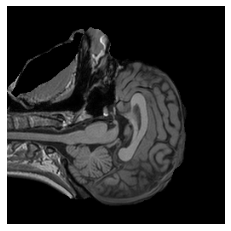

In [43]:
# Load the image data from the file
image = nib.load('unzipped_test.nii')

# Get the image data as a numpy array
data = image.get_fdata()

# Display the image data
plt.imshow(data[:,:,data.shape[-1]//2], cmap='gray')
plt.axis('off')
plt.show()

# Save the image as JPEG
plt.imsave('test.jpg', data[:,:,data.shape[-1]//2], cmap='gray')

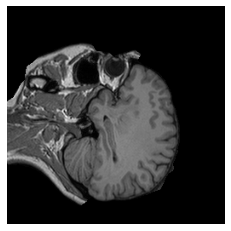

In [44]:
# Load the image data from the file
image = nib.load('unzipped_test.nii')

# Get the image data as a numpy array
data = image.get_fdata()

# Select the slice index you want to display or save (e.g., slice 20)
slice_index = 100

# Display the image data for the selected slice
plt.imshow(data[:,:,slice_index], cmap='gray')
plt.axis('off')
plt.show()

# Save the image for the selected slice as JPEG
plt.imsave(f'slice_{slice_index}.jpg', data[:,:,slice_index], cmap='gray')

non-stripped


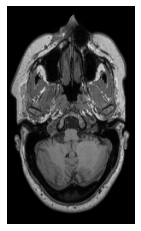

stripped


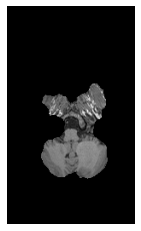

In [3]:
nfilepath = './image_data/BSE_BET_DATA/nifti_files/IXI369-Guys-0924-T1_bet_03.nii'
sfilepath = './image_data/BSE_BET_DATA/nifti_files/IXI369-Guys-0924-T1_bet_8.nii'


def process_scan_file(filepath):
    # Load the image data from the file
    image = nib.load(filepath)

    # Get the image data as a numpy array
    data = image.get_fdata()

    # Select the slice index you want to display or save (e.g., slice 20)
    slice_index = 100
    center = 90

    # Display the image data for the selected slice
    plt.imshow(data[:,center,:], cmap='gray')
    plt.axis('off')
    plt.show()

    # Save the image for the selected slice as JPEG
    # plt.imsave(f'slice_{center}.jpg', data[:,center,:], cmap='gray')

    
print("non-stripped")
process_scan_file(nfilepath)

print("stripped")
process_scan_file(sfilepath)

In [ ]:
# import nibabel as nib
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from scipy.ndimage import zoom


filepath = './image_data/BSE_BET_DATA/nifti_files/IXI369-Guys-0924-T1_bet_8.nii'


# Load the image data from the file
image = nib.load(filepath)
data = image.get_fdata()

# Normalize the image data to have zero mean and unit variance
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1,1)).reshape(data.shape)

# Resize the image data to a fixed size (e.g., 64x64x64)
new_shape = (5,5,5)
print(data.shape)
data = zoom(data, new_shape)

# Convert the 3D image data to a 4D array with an additional dimension for the channels
data = np.expand_dims(data, axis=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define and train the CNN using a framework like TensorFlow or PyTorch
# ...


(256, 256, 150)


In [39]:
def unzip_files(folderpath):
    
    for file in os.listdir(folderpath):
        filepath = os.path.join(folderpath, file)
    
        with gzip.open(filepath, 'rb') as f_in:
            outpath = os.path.splitext(filepath)[0]
            print(f"outpath: {outpath} | filename: {file[:-3]}")
            outputfolder = os.path.join("./image_data/BSE_BET_DATA/nifti_files", file[:-3])
            with open(outputfolder, 'wb') as f_out:
                f_out.write(f_in.read())
        print(file)
    

def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan

def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 48
    desired_width = 64
    desired_height = 64
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def display_scan(data):
    # Select the slice index you want to display or save (e.g., slice 20)
    slice_index = 100
    center = 128

    # Display the image data for the selected slice
    plt.imshow(data[:,center,:], cmap='gray')
    plt.axis('off')
    plt.show()

    # Save the image for the selected slice as JPEG
    plt.imsave(f'slice_{center}.jpg', data[:,center,:], cmap='gray')


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    
    display_scan(data)
    return volume

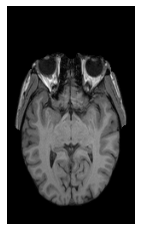

(64, 64, 48)


In [40]:
folderpath = "./image_data/BSE_BET_DATA/files"
nifti_folder = "./image_data/BSE_BET_DATA/nifti_files"

# uncomment this if you haven't unzipped the folders
# unzip_files(folderpath)

for file in os.listdir(nifti_folder):
    path = os.path.join(nifti_folder, file)
    img = process_scan(path)
    print(img.shape)
    break